## Chi-Square test

Used for 2 purposes:
1. Tests for independence
2. Goodness of fit test

Assume that we want to test if there is a statistically significant difference in Genders (M, F) population between Smokers and Non-Smokers. Let’s generate some sample data to work on it.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


## Contingency Table
To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. We will use the crosstab command from pandas.

In [2]:
# Frequency table
contigency= pd.crosstab(df['Gender'], df['isSmoker']) 
contigency

isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


In [3]:
## Let’s say that we want to get the percentages by Gender (row)
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


In [8]:
## Let’s say that we want to get the percentages by isSmoker (column)
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='columns')
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.5,0.333333
M,0.5,0.666667


In [6]:
## Let’s say that we want to get the percentages by Gender (row)
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='all')
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.2,0.2
M,0.2,0.4


If we want the percentages by column, then we should write normalize='columns' and if we want the total percentage then we should write normalize=’all’

<AxesSubplot:xlabel='isSmoker', ylabel='Gender'>

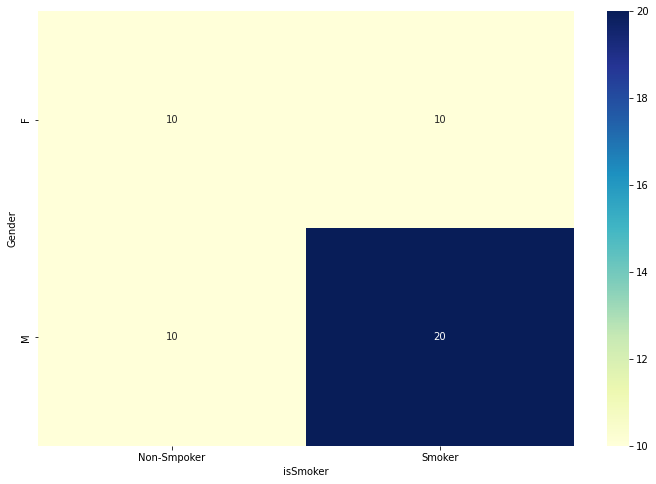

In [4]:
## An easy way to see visually the contingency tables are the heatmaps.
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [9]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)
print(expected)

0.3767591178115821
[[ 8. 12.]
 [12. 18.]]


chi2: The test statistic

p: The p-value of the test

dof: Degrees of freedom

expected: The expected frequencies, based on the marginal sums of the table

## Inference
The p-value is 37.67% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Smokers and Gender are independent. In this example, the contingency table was 2×2. We could have applied z-test for proportions instead of Chi-Square test. Notice that the Chi-Square test can be extended to m x n contingency tables.